In [118]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

def weekend_and_work_hours(dataframe, date_column:str, start_hours:int, stop_hours:int):
    dataframe['time_since_week_start'] = dataframe[date_column].apply(lambda x: pd.Timedelta('{} days {}'.format(x.weekday(), x.time())))
    dataframe['weekend'] = dataframe[date_column].apply(lambda x: True if 4<x.weekday()<7 else True
                                                        if x.weekday() == 4 and x.hour>stop_hours-1 else True 
                                                        if x.weekday() == 0 and x.hour<start_hours else False)
    dataframe['work_time'] = dataframe[date_column].apply(lambda x: False if 4<x.weekday()<7 else True if start_hours<=x.hour<stop_hours else False)
    dataframe['time_to_work_hours'] = dataframe[date_column].apply(lambda x: pd.Timedelta('0h0m') if x.weekday()<5 and start_hours<=x.hour<stop_hours else
                                                                       datetime.datetime.combine(x.date(), datetime.time(start_hours,0,0,0)) - x if x.weekday()<5 and start_hours>x.hour else
                                                                       datetime.datetime.combine(x.date()+datetime.timedelta(days = 1), datetime.time(stop_hours,0,0,0)) - x if x.weekday()<4 and stop_hours<=x.hour else
                                                                        datetime.datetime.combine((x.date()+datetime.timedelta(days = 7-x.weekday())), datetime.time(start_hours,0,0,0)) - x) 
    return dataframe

def national_holidays(dataframe, holiday_dates:list):
    dataframe['time_until_next_holiday'] = dataframe['case REG_DATE'].apply(lambda x: pd.Timedelta('0h0m') if x.date() in holiday_dates else 
                                                                            min(holiday - x.date() for holiday in holiday_dates if (holiday - x.date())>pd.Timedelta('0 days')))
    dataframe['is_holiday'] = dataframe['case REG_DATE'].apply(lambda x: True if x.date() in holiday_dates else False)
    return dataframe

In [119]:
a = pd.read_csv('BPI_Challenge_2012-training (1).csv')
start = time.time()
a['case REG_DATE'] = pd.to_datetime(a['case REG_DATE'])
a['event time:timestamp'] = pd.to_datetime(a['event time:timestamp'])
a = weekend_and_work_hours(a, 'case REG_DATE', 9, 17)

end = time.time()
total_time = end - start
print("Time weekends: \n"+ str(total_time))
start = time.time()
holidays = [datetime.date(2011,1,1), datetime.date(2011,4,24), datetime.date(2011,4,25), datetime.date(2011,4,30), datetime.date(2011,5,5),
            datetime.date(2011,6,2), datetime.date(2011,6,12), datetime.date(2011,6,13), datetime.date(2011,12,24), datetime.date(2011,12,25),
            datetime.date(2011,12,26), datetime.date(2011,12,31), datetime.date(2012,1,1), datetime.date(2012,4,8), datetime.date(2012,4,9),
            datetime.date(2012,4,30), datetime.date(2012,5,5), datetime.date(2012,5,17), datetime.date(2012,5,27), datetime.date(2012,5,28),
            datetime.date(2012,12,24), datetime.date(2012,12,25), datetime.date(2012,12,26), datetime.date(2012,12,31)]
a = national_holidays(a, holidays)
end = time.time()
total_time = end - start
print("Time holidays: \n"+ str(total_time))
a

Time weekends: 
41.32235407829285
Time holidays: 
103.49472975730896


eventID   case concept:name           case REG_DATE  \
0                    0             173688 2011-01-10 00:38:44.546   
1                    1             173688 2011-01-10 00:38:44.546   
2                    2             173688 2011-01-10 00:38:44.546   
3                    3             173688 2011-01-10 00:38:44.546   
4           4294967296             173691 2011-01-10 08:08:58.256   
...                ...                ...                     ...   
239781  53081500811284             212154 2012-02-23 14:00:21.169   
239782  40896678592559             203362 2012-01-23 20:02:26.492   
239783  40896678592560             203362 2012-01-23 20:02:26.492   
239784  54047868452879             212830 2012-02-25 19:30:25.147   
239785  54047868452880             212830 2012-02-25 19:30:25.147   

        case AMOUNT_REQ  event org:resource      event concept:name  \
0                 20000               112.0             A_SUBMITTED   
1                 20000               112.0       A_PARTLYSUBMITTED   
2                 20000               112.0           A_PREACCEPTED   
3                 20000               112.0  W_Completeren aanvraag   
4                  5000               112.0             A_SUBMITTED   
...                 ...                 ...                     ...   
239781             3000             11169.0     W_Nabellen offertes   
239782             7000             11122.0     W_Nabellen offertes   
239783             7000             11122.0     W_Nabellen offertes   
239784             8500             10863.0             A_CANCELLED   
239785             8500             10863.0  W_Completeren aanvraag   

       event lifecycle:transition    event time:timestamp  \
0                        COMPLETE 2011-01-10 00:38:44.546   
1                        COMPLETE 2011-01-10 00:38:44.880   
2                        COMPLETE 2011-01-10 00:39:37.906   
3                        SCHEDULE 2011-01-10 00:39:38.875   
4                        COMPLETE 2011-01-10 08:08:58.256   
...                           ...                     ...   
239781                   COMPLETE 2012-06-03 19:05:51.706   
239782                      START 2012-06-03 19:10:07.405   
239783                   COMPLETE 2012-06-03 19:11:20.054   
239784                   COMPLETE 2012-06-03 19:11:59.483   
239785                   COMPLETE 2012-06-03 19:12:01.160   

        time_since_week_start  weekend  work_time     time_to_work_hours  \
0      0 days 00:38:44.546000     True      False 0 days 08:21:15.454000   
1      0 days 00:38:44.546000     True      False 0 days 08:21:15.454000   
2      0 days 00:38:44.546000     True      False 0 days 08:21:15.454000   
3      0 days 00:38:44.546000     True      False 0 days 08:21:15.454000   
4      0 days 08:08:58.256000     True      False 0 days 00:51:01.744000   
...                       ...      ...        ...                    ...   
239781 3 days 14:00:21.169000    False       True        0 days 00:00:00   
239782 0 days 20:02:26.492000    False      False 0 days 20:57:33.508000   
239783 0 days 20:02:26.492000    False      False 0 days 20:57:33.508000   
239784 5 days 19:30:25.147000     True      False 1 days 13:29:34.853000   
239785 5 days 19:30:25.147000     True      False 1 days 13:29:34.853000   

       time_until_next_holiday  is_holiday  
0                     104 days       False  
1                     104 days       False  
2                     104 days       False  
3                     104 days       False  
4                     104 days       False  
...                        ...         ...  
239781                 45 days       False  
239782                 76 days       False  
239783                 76 days       False  
239784                 43 days       False  
239785                 43 days       False  

[239786 rows x 14 columns]

In [22]:
a[a['eventID ']==0]

eventID   case concept:name            case REG_DATE  case AMOUNT_REQ  \
0         0             173688  01-10-2011 00:38:44.546            20000   

   event org:resource event concept:name event lifecycle:transition  \
0               112.0        A_SUBMITTED                   COMPLETE   

      event time:timestamp  
0  01-10-2011 00:38:44.546

In [28]:
grouped = pd.DataFrame(a.groupby(['event concept:name', 'event org:resource'])['eventID '].count())
grouped

eventID 
event concept:name          event org:resource          
A_ACCEPTED                  10138.0                    8
                            10228.0                    5
                            10609.0                   10
                            10629.0                   28
                            10779.0                    2
...                                                  ...
W_Wijzigen contractgegevens 10124.0                    1
                            10125.0                    2
                            10912.0                    1
                            11019.0                    3
                            11203.0                    4

[879 rows x 1 columns]

In [30]:
grouped[grouped['event org:resource	']==np.NaN]

KeyError: 'event org:resource\t'

In [34]:
grouped.unstack().loc[:, np.NaN]

KeyError: nan

In [39]:
a[a['event org:resource'].isna()].groupby('event concept:name').count()['eventID ']

event concept:name
W_Afhandelen leads                1604
W_Beoordelen fraude                  4
W_Completeren aanvraag            6397
W_Nabellen incomplete dossiers    1960
W_Nabellen offertes               7253
W_Valideren aanvraag               619
W_Wijzigen contractgegevens          1
Name: eventID , dtype: int64

In [40]:
a.groupby('event concept:name').count()['eventID ']

event concept:name
A_ACCEPTED                         4583
A_ACTIVATED                        2126
A_APPROVED                         2126
A_CANCELLED                        2691
A_DECLINED                         7590
A_FINALIZED                        4487
A_PARTLYSUBMITTED                 12478
A_PREACCEPTED                      6758
A_REGISTERED                       2126
A_SUBMITTED                       12478
O_ACCEPTED                         2123
O_CANCELLED                        3346
O_CREATED                          6270
O_DECLINED                          760
O_SELECTED                         6270
O_SENT                             6270
O_SENT_BACK                        3167
W_Afhandelen leads                15953
W_Beoordelen fraude                 642
W_Completeren aanvraag            49310
W_Nabellen incomplete dossiers    22447
W_Nabellen offertes               46628
W_Valideren aanvraag              19145
W_Wijzigen contractgegevens          12
Name: eventID , dtype

In [59]:
for i in a.index:
    if 4>a.at[i, 'case REG_DATE'].weekday()>7:
        a.at[i, 'weekend'] = True
    elif a.at[i, 'case REG_DATE'].weekday() == 4 and a.at[i, 'case REG_DATE'].hour>17:
        a.at[i, 'weekend'] = True
    elif a.at[i, 'case REG_DATE'].weekday() == 0 and a.at[i, 'case REG_DATE'].hour<8:
        a.at[i, 'weekend'] = True
    else:
        a.at[i, 'weekend'] = False

a

eventID   case concept:name           case REG_DATE  \
0                    0             173688 2011-01-10 00:38:44.546   
1                    1             173688 2011-01-10 00:38:44.546   
2                    2             173688 2011-01-10 00:38:44.546   
3                    3             173688 2011-01-10 00:38:44.546   
4           4294967296             173691 2011-01-10 08:08:58.256   
...                ...                ...                     ...   
239781  53081500811284             212154 2012-02-23 14:00:21.169   
239782  40896678592559             203362 2012-01-23 20:02:26.492   
239783  40896678592560             203362 2012-01-23 20:02:26.492   
239784  54047868452879             212830 2012-02-25 19:30:25.147   
239785  54047868452880             212830 2012-02-25 19:30:25.147   

        case AMOUNT_REQ  event org:resource      event concept:name  \
0                 20000               112.0             A_SUBMITTED   
1                 20000               112.0       A_PARTLYSUBMITTED   
2                 20000               112.0           A_PREACCEPTED   
3                 20000               112.0  W_Completeren aanvraag   
4                  5000               112.0             A_SUBMITTED   
...                 ...                 ...                     ...   
239781             3000             11169.0     W_Nabellen offertes   
239782             7000             11122.0     W_Nabellen offertes   
239783             7000             11122.0     W_Nabellen offertes   
239784             8500             10863.0             A_CANCELLED   
239785             8500             10863.0  W_Completeren aanvraag   

       event lifecycle:transition    event time:timestamp weekend  
0                        COMPLETE 2011-01-10 00:38:44.546    True  
1                        COMPLETE 2011-01-10 00:38:44.880    True  
2                        COMPLETE 2011-01-10 00:39:37.906    True  
3                        SCHEDULE 2011-01-10 00:39:38.875    True  
4                        COMPLETE 2011-01-10 08:08:58.256   False  
...                           ...                     ...     ...  
239781                   COMPLETE 2012-06-03 19:05:51.706   False  
239782                      START 2012-06-03 19:10:07.405   False  
239783                   COMPLETE 2012-06-03 19:11:20.054   False  
239784                   COMPLETE 2012-06-03 19:11:59.483   False  
239785                   COMPLETE 2012-06-03 19:12:01.160   False  

[239786 rows x 9 columns]

In [41]:
a.index

RangeIndex(start=0, stop=239786, step=1)

In [47]:
a.dtypes

eventID                                int64
case concept:name                      int64
case REG_DATE                 datetime64[ns]
case AMOUNT_REQ                        int64
event org:resource                   float64
event concept:name                    object
event lifecycle:transition            object
event time:timestamp                  object
dtype: object

In [54]:
a.at[1, 'case REG_DATE'].weekday()

0

In [57]:
a.at[4, 'case REG_DATE'].hour

8

In [ ]:
a.at[4, 'case REG_DATE']

In [63]:
a.loc[1000]

eventID                                     493921239051
case concept:name                                 174045
case REG_DATE                 2011-03-10 12:15:14.680000
case AMOUNT_REQ                                    25000
event org:resource                                 10809
event concept:name                W_Completeren aanvraag
event lifecycle:transition                      COMPLETE
event time:timestamp          2011-03-10 12:19:32.500000
weekend                                            False
Name: 1000, dtype: object

In [70]:
pd.Timedelta('{} days {}'.format(a.at[1000, 'case REG_DATE'].weekday(), a.at[1000, 'case REG_DATE'].time()))

Timedelta('3 days 12:15:14.680000')

In [83]:
a['case REG_DATE'].apply(lambda x: print(x) if(str(x)[0]!='2') else np.NaN)[
    ~a['case REG_DATE'].apply(lambda x: print(x) if(str(x)[0]!='2') else np.NaN).isna()]

Series([], Name: case REG_DATE, dtype: float64)

In [85]:
a['case REG_DATE'].isna().sum()

0

In [99]:
'{} days {}'.format(
    a['case REG_DATE'].apply(lambda x: x.weekday()).tolist(), a['case REG_DATE'].apply(lambda x: x.time()).tolist())

'[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:
a['case REG_DATE'].apply(lambda x: x.weekday()).tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [106]:
a['weekend'] = a['case REG_DATE'].apply(lambda x: True if 4>x.weekday()>7 else True
                                                           if x.weekday() == 4 and x.hour>17 else True if x.weekday() == 0 and x.hour<8 
                                                                                                else False)
a

eventID   case concept:name           case REG_DATE  \
0                    0             173688 2011-01-10 00:38:44.546   
1                    1             173688 2011-01-10 00:38:44.546   
2                    2             173688 2011-01-10 00:38:44.546   
3                    3             173688 2011-01-10 00:38:44.546   
4           4294967296             173691 2011-01-10 08:08:58.256   
...                ...                ...                     ...   
239781  53081500811284             212154 2012-02-23 14:00:21.169   
239782  40896678592559             203362 2012-01-23 20:02:26.492   
239783  40896678592560             203362 2012-01-23 20:02:26.492   
239784  54047868452879             212830 2012-02-25 19:30:25.147   
239785  54047868452880             212830 2012-02-25 19:30:25.147   

        case AMOUNT_REQ  event org:resource      event concept:name  \
0                 20000               112.0             A_SUBMITTED   
1                 20000               112.0       A_PARTLYSUBMITTED   
2                 20000               112.0           A_PREACCEPTED   
3                 20000               112.0  W_Completeren aanvraag   
4                  5000               112.0             A_SUBMITTED   
...                 ...                 ...                     ...   
239781             3000             11169.0     W_Nabellen offertes   
239782             7000             11122.0     W_Nabellen offertes   
239783             7000             11122.0     W_Nabellen offertes   
239784             8500             10863.0             A_CANCELLED   
239785             8500             10863.0  W_Completeren aanvraag   

       event lifecycle:transition    event time:timestamp  \
0                        COMPLETE 2011-01-10 00:38:44.546   
1                        COMPLETE 2011-01-10 00:38:44.880   
2                        COMPLETE 2011-01-10 00:39:37.906   
3                        SCHEDULE 2011-01-10 00:39:38.875   
4                        COMPLETE 2011-01-10 08:08:58.256   
...                           ...                     ...   
239781                   COMPLETE 2012-06-03 19:05:51.706   
239782                      START 2012-06-03 19:10:07.405   
239783                   COMPLETE 2012-06-03 19:11:20.054   
239784                   COMPLETE 2012-06-03 19:11:59.483   
239785                   COMPLETE 2012-06-03 19:12:01.160   

        time_since_week_start  weekend  
0      0 days 00:38:44.546000     True  
1      0 days 00:38:44.546000     True  
2      0 days 00:38:44.546000     True  
3      0 days 00:38:44.546000     True  
4      0 days 08:08:58.256000    False  
...                       ...      ...  
239781 3 days 14:00:21.169000    False  
239782 0 days 20:02:26.492000    False  
239783 0 days 20:02:26.492000    False  
239784 5 days 19:30:25.147000    False  
239785 5 days 19:30:25.147000    False  

[239786 rows x 10 columns]

In [120]:
a.at[4, 'case REG_DATE'].datetime()- datetime.time(8, 0, 0, 0)

TypeError: unsupported operand type(s) for -: 'datetime.time' and 'datetime.time'

In [118]:
import datetime

In [137]:
a.at[4, 'case REG_DATE'] - datetime.datetime.combine(a.at[4, 'case REG_DATE'].date(), datetime.time(8,0,0,0))

Timedelta('0 days 00:08:58.256000')

In [135]:
datetime.datetime.combine(a.at[4, 'case REG_DATE'].date(), datetime.time(8,0,0,0))

datetime.datetime(2011, 1, 10, 8, 0)

In [134]:
datetime.time(hours = 8)

TypeError: 'hours' is an invalid keyword argument for this function

In [139]:
datetime.datetime.combine(a.at[1, 'case REG_DATE'].date(), datetime.time(8,0,0,0)) - a.at[1, 'case REG_DATE']

Timedelta('0 days 07:21:15.454000')

In [69]:
a[~a['weekend']].sort_values('time_since_week_start')

eventID   case concept:name           case REG_DATE  \
174981  40548786241538             203119 2012-01-23 08:01:35.272   
174980  40548786241537             203119 2012-01-23 08:01:35.272   
174979  40548786241536             203119 2012-01-23 08:01:35.272   
85938   21711059681284             189439 2011-11-28 08:01:43.238   
85919   21711059681282             189439 2011-11-28 08:01:43.238   
...                ...                ...                     ...   
63566   11428907974677             182035 2011-03-11 17:59:57.577   
46407   11428907974670             182035 2011-03-11 17:59:57.577   
63586   11428907974678             182035 2011-03-11 17:59:57.577   
44413   11428907974661             182035 2011-03-11 17:59:57.577   
65787   11428907974683             182035 2011-03-11 17:59:57.577   

        case AMOUNT_REQ  event org:resource      event concept:name  \
174981             7500               112.0              A_DECLINED   
174980             7500               112.0       A_PARTLYSUBMITTED   
174979             7500               112.0             A_SUBMITTED   
85938              5000             10910.0              A_DECLINED   
85919              5000               112.0      W_Afhandelen leads   
...                 ...                 ...                     ...   
63566              5000             11203.0  W_Completeren aanvraag   
46407              5000             11203.0  W_Completeren aanvraag   
63586              5000             11203.0  W_Completeren aanvraag   
44413              5000                 NaN      W_Afhandelen leads   
65787              5000             11181.0  W_Completeren aanvraag   

       event lifecycle:transition    event time:timestamp  \
174981                   COMPLETE 2012-01-23 08:02:35.907   
174980                   COMPLETE 2012-01-23 08:01:38.758   
174979                   COMPLETE 2012-01-23 08:01:35.273   
85938                    COMPLETE 2011-11-28 09:02:54.704   
85919                    SCHEDULE 2011-11-28 08:02:27.097   
...                           ...                     ...   
63566                       START 2011-11-14 19:34:11.576   
46407                    COMPLETE 2011-04-11 18:32:02.576   
63586                    COMPLETE 2011-11-14 19:41:22.647   
44413                       START 2011-03-11 18:58:43.200   
65787                       START 2011-11-15 19:30:37.087   

        time_since_week_start  weekend  work_time time_to_work_hours  
174981 0 days 08:01:35.272000    False       True             0 days  
174980 0 days 08:01:35.272000    False       True             0 days  
174979 0 days 08:01:35.272000    False       True             0 days  
85938  0 days 08:01:43.238000    False       True             0 days  
85919  0 days 08:01:43.238000    False       True             0 days  
...                       ...      ...        ...                ...  
63566  4 days 17:59:57.577000    False       True             0 days  
46407  4 days 17:59:57.577000    False       True             0 days  
63586  4 days 17:59:57.577000    False       True             0 days  
44413  4 days 17:59:57.577000    False       True             0 days  
65787  4 days 17:59:57.577000    False       True             0 days  

[175911 rows x 12 columns]

In [35]:
a.sort_values('time_until_next_holiday')

eventID   case concept:name           case REG_DATE  \
119892  25005299597345             191821 2011-06-12 23:27:25.196   
135232  30227979829272             195627 2011-12-26 15:03:08.606   
135231  30227979829271             195627 2011-12-26 15:03:08.606   
135230  30227979829270             195627 2011-12-26 15:03:08.606   
135229  30227979829269             195627 2011-12-26 15:03:08.606   
...                ...                ...                     ...   
184298  34389803139140             198627 2012-06-01 14:36:49.064   
168098  34432752812063             198657 2012-06-01 15:33:20.026   
168097  34432752812060             198657 2012-06-01 15:33:20.026   
184707  34376918237221             198618 2012-06-01 14:06:56.420   
148260  34312493727748             198573 2012-06-01 12:54:33.190   

        case AMOUNT_REQ  event org:resource              event concept:name  \
119892            12000             10972.0  W_Nabellen incomplete dossiers   
135232            15000             11049.0             W_Nabellen offertes   
135231            15000             11049.0            W_Valideren aanvraag   
135230            15000             11049.0                     O_SENT_BACK   
135229            15000             11049.0             W_Nabellen offertes   
...                 ...                 ...                             ...   
184298             9500             11002.0  W_Nabellen incomplete dossiers   
168098            30000             10138.0                    A_REGISTERED   
168097            30000             10138.0                      O_ACCEPTED   
184707            22000             11180.0             W_Nabellen offertes   
148260            10000             11119.0          W_Completeren aanvraag   

       event lifecycle:transition    event time:timestamp  \
119892                   SCHEDULE 2011-12-19 11:15:50.162   
135232                   COMPLETE 2011-12-29 12:03:36.177   
135231                   SCHEDULE 2011-12-29 12:03:34.235   
135230                   COMPLETE 2011-12-29 12:03:34.103   
135229                      START 2011-12-29 12:03:24.654   
...                           ...                     ...   
184298                   COMPLETE 2012-01-26 18:38:21.020   
168098                   COMPLETE 2012-01-18 11:37:16.495   
168097                   COMPLETE 2012-01-18 11:37:16.494   
184707                   COMPLETE 2012-01-26 20:51:58.291   
148260                      START 2012-06-01 12:55:24.559   

        time_since_week_start  weekend  work_time     time_to_work_hours  \
119892 6 days 23:27:25.196000     True      False 0 days 08:32:34.804000   
135232 0 days 15:03:08.606000    False       True        0 days 00:00:00   
135231 0 days 15:03:08.606000    False       True        0 days 00:00:00   
135230 0 days 15:03:08.606000    False       True        0 days 00:00:00   
135229 0 days 15:03:08.606000    False       True        0 days 00:00:00   
...                       ...      ...        ...                    ...   
184298 4 days 14:36:49.064000    False       True        0 days 00:00:00   
168098 4 days 15:33:20.026000    False       True        0 days 00:00:00   
168097 4 days 15:33:20.026000    False       True        0 days 00:00:00   
184707 4 days 14:06:56.420000    False       True        0 days 00:00:00   
148260 4 days 12:54:33.190000    False       True        0 days 00:00:00   

       time_until_next_holiday  
119892                  0 days  
135232                  0 days  
135231                  0 days  
135230                  0 days  
135229                  0 days  
...                        ...  
184298                206 days  
168098                206 days  
168097                206 days  
184707                206 days  
148260                206 days  

[239786 rows x 13 columns]

In [70]:
a[['weekend', 'work_time']].value_counts()

weekend  work_time
False    True         114629
True     False         63875
False    False         61282
dtype: int64

In [1]:
pip show matplotlib

Name: matplotlib
Version: 3.5.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\woute\appdata\roaming\python\python37\site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: mlxtend, mne, pactools, pm4py, scikit-image, seaborn
Note: you may need to restart the kernel to use updated packages.


In [164]:
!conda info


     active environment : base
    active env location : C:\Users\woute\anaconda3
            shell level : 1
       user config file : C:\Users\woute\.condarc
 populated config files : C:\Users\woute\.condarc
          conda version : 4.12.0
    conda-build version : 3.18.11
         python version : 3.7.6.final.0
       virtual packages : __cuda=11.7=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\woute\anaconda3  (writable)
      conda av data dir : C:\Users\woute\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/no

In [165]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip3 install --upgrade matplotlib --user

In [36]:
b = a.copy()
b['hour'] = b['case REG_DATE'].apply(lambda x: x.hour)
b['day'] = b['case REG_DATE'].apply(lambda x: x.weekday())
b

eventID   case concept:name           case REG_DATE  \
0                    0             173688 2011-01-10 00:38:44.546   
1                    1             173688 2011-01-10 00:38:44.546   
2                    2             173688 2011-01-10 00:38:44.546   
3                    3             173688 2011-01-10 00:38:44.546   
4           4294967296             173691 2011-01-10 08:08:58.256   
...                ...                ...                     ...   
239781  53081500811284             212154 2012-02-23 14:00:21.169   
239782  40896678592559             203362 2012-01-23 20:02:26.492   
239783  40896678592560             203362 2012-01-23 20:02:26.492   
239784  54047868452879             212830 2012-02-25 19:30:25.147   
239785  54047868452880             212830 2012-02-25 19:30:25.147   

        case AMOUNT_REQ  event org:resource      event concept:name  \
0                 20000               112.0             A_SUBMITTED   
1                 20000               112.0       A_PARTLYSUBMITTED   
2                 20000               112.0           A_PREACCEPTED   
3                 20000               112.0  W_Completeren aanvraag   
4                  5000               112.0             A_SUBMITTED   
...                 ...                 ...                     ...   
239781             3000             11169.0     W_Nabellen offertes   
239782             7000             11122.0     W_Nabellen offertes   
239783             7000             11122.0     W_Nabellen offertes   
239784             8500             10863.0             A_CANCELLED   
239785             8500             10863.0  W_Completeren aanvraag   

       event lifecycle:transition    event time:timestamp  \
0                        COMPLETE 2011-01-10 00:38:44.546   
1                        COMPLETE 2011-01-10 00:38:44.880   
2                        COMPLETE 2011-01-10 00:39:37.906   
3                        SCHEDULE 2011-01-10 00:39:38.875   
4                        COMPLETE 2011-01-10 08:08:58.256   
...                           ...                     ...   
239781                   COMPLETE 2012-06-03 19:05:51.706   
239782                      START 2012-06-03 19:10:07.405   
239783                   COMPLETE 2012-06-03 19:11:20.054   
239784                   COMPLETE 2012-06-03 19:11:59.483   
239785                   COMPLETE 2012-06-03 19:12:01.160   

        time_since_week_start  weekend  work_time     time_to_work_hours  \
0      0 days 00:38:44.546000     True      False 0 days 07:21:15.454000   
1      0 days 00:38:44.546000     True      False 0 days 07:21:15.454000   
2      0 days 00:38:44.546000     True      False 0 days 07:21:15.454000   
3      0 days 00:38:44.546000     True      False 0 days 07:21:15.454000   
4      0 days 08:08:58.256000    False       True        0 days 00:00:00   
...                       ...      ...        ...                    ...   
239781 3 days 14:00:21.169000    False       True        0 days 00:00:00   
239782 0 days 20:02:26.492000    False      False 0 days 21:57:33.508000   
239783 0 days 20:02:26.492000    False      False 0 days 21:57:33.508000   
239784 5 days 19:30:25.147000     True      False 1 days 12:29:34.853000   
239785 5 days 19:30:25.147000     True      False 1 days 12:29:34.853000   

       time_until_next_holiday  hour  day  
0                     104 days     0    0  
1                     104 days     0    0  
2                     104 days     0    0  
3                     104 days     0    0  
4                     104 days     8    0  
...                        ...   ...  ...  
239781                 45 days    14    3  
239782                 76 days    20    0  
239783                 76 days    20    0  
239784                 43 days    19    5  
239785                 43 days    19    5  

[239786 rows x 15 columns]

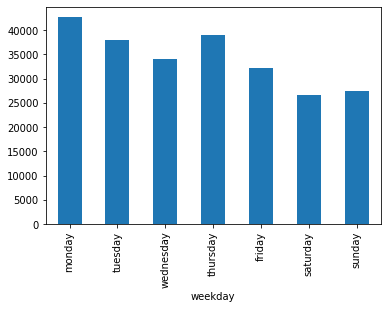

In [6]:
b.groupby('weekday').count().loc[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']]['eventID '].plot(kind = 'bar');

In [80]:
b['weekday'] = b['day'].apply(lambda x: {0:'monday', 1:'tuesday', 2:'wednesday', 3:'thursday', 4:'friday', 5:'saturday', 6:'sunday'}[x])
b['hour_of_day'] = b['hour'].apply(lambda x: {0: '00:00-00:59', 1: '01:00-01:59', 2: '02:00-02:59', 3: '03:00-03:59', 4: '04:00-04:59',
                                              5: '05:00-05:59', 6: '06:00-06:59', 7: '07:00-07:59', 8: '08:00-08:59', 9: '09:00-09:59',
                                              10: '10:00-10:59', 11: '11:00-11:59', 12: '12:00-12:59', 13: '13:00-13:59', 14: '14:00-14:59',
                                              15: '15:00-15:59', 16: '16:00-16:59', 17: '17:00-17:59', 18: '18:00-18:59', 19: '19:00-19:59',
                                              20: '20:00-20:59', 21: '21:00-21:59', 22: '22:00-22:59', 23: '23:00-23:59'}[x])
b['date'] = b['case REG_DATE'].apply(lambda x: x.date())

<AxesSubplot:xlabel='day'>

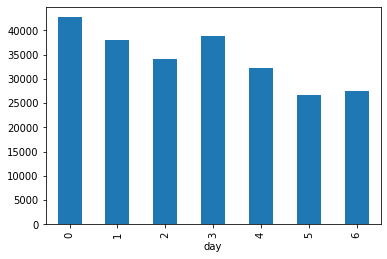

In [7]:
b.groupby('day').count()['eventID '].plot(kind = 'bar')

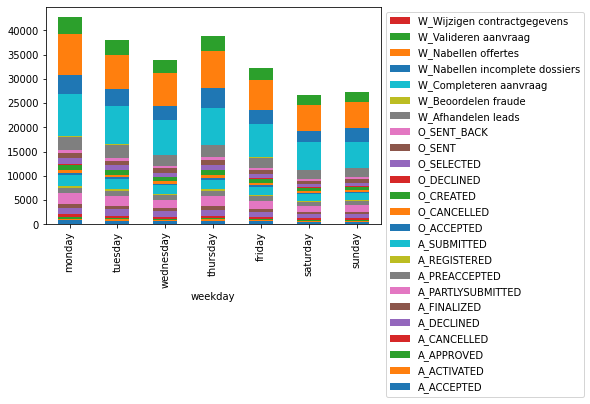

In [10]:
ax = b.groupby(['weekday', 'event concept:name']).count()['eventID '].unstack().loc[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].plot(kind = 'bar', stacked = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.0, 1.0));

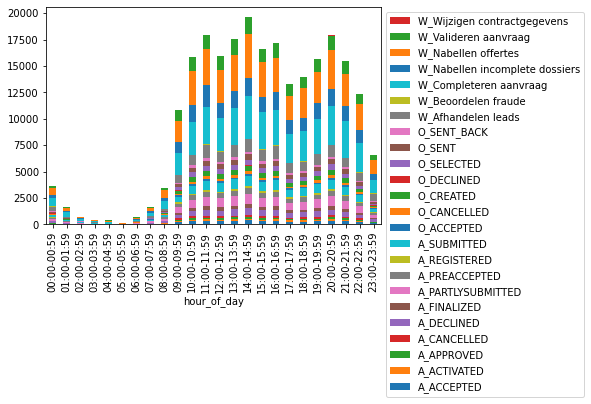

In [11]:
ax = b.groupby(['hour_of_day', 'event concept:name']).count()['eventID '].unstack().loc[['00:00-00:59', '01:00-01:59',
                                                                                         '02:00-02:59', '03:00-03:59',
                                                                                         '04:00-04:59', '05:00-05:59',
                                                                                         '06:00-06:59', '07:00-07:59',
                                                                                         '08:00-08:59', '09:00-09:59',
                                                                                         '10:00-10:59', '11:00-11:59',
                                                                                         '12:00-12:59', '13:00-13:59',
                                                                                         '14:00-14:59', '15:00-15:59',
                                                                                         '16:00-16:59', '17:00-17:59',
                                                                                         '18:00-18:59', '19:00-19:59',
                                                                                         '20:00-20:59', '21:00-21:59',
                                                                                         '22:00-22:59', '23:00-23:59']].plot(kind = 'bar', stacked = True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0));

In [27]:
b.groupby(['weekday', 'event concept:name']).count().loc[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']]['eventID '].unstack()

event concept:name  A_ACCEPTED  A_ACTIVATED  A_APPROVED  A_CANCELLED  \
weekday                                                                
friday                   629.0        283.0       283.0        358.0   
monday                   834.0        393.0       393.0        470.0   
saturday                 510.0        229.0       229.0        317.0   
sunday                   511.0        244.0       244.0        305.0   
thursday                 748.0        338.0       338.0        429.0   
tuesday                  717.0        347.0       347.0        404.0   
wednesday                634.0        292.0       292.0        408.0   

event concept:name  A_DECLINED  A_FINALIZED  A_PARTLYSUBMITTED  A_PREACCEPTED  \
weekday                                                                         
friday                  1043.0        617.0             1691.0          915.0   
monday                  1310.0        814.0             2183.0         1219.0   
saturday                 783.0        495.0             1336.0          765.0   
sunday                   846.0        501.0             1399.0          750.0   
thursday                1237.0        731.0             2021.0         1069.0   
tuesday                 1309.0        701.0             2067.0         1053.0   
wednesday               1062.0        628.0             1781.0          987.0   

event concept:name  A_REGISTERED  A_SUBMITTED  ...  O_SELECTED  O_SENT  \
weekday                                        ...                       
friday                     283.0       1691.0  ...       852.0   852.0   
monday                     393.0       2183.0  ...      1149.0  1149.0   
saturday                   229.0       1336.0  ...       708.0   708.0   
sunday                     244.0       1399.0  ...       731.0   731.0   
thursday                   338.0       2021.0  ...      1025.0  1025.0   
tuesday                    347.0       2067.0  ...       951.0   951.0   
wednesday                  292.0       1781.0  ...       854.0   854.0   

event concept:name  O_SENT_BACK  W_Afhandelen leads  W_Beoordelen fraude  \
weekday                                                                    
friday                    436.0              2115.0                 94.0   
monday                    587.0              2743.0                143.0   
saturday                  356.0              1738.0                 60.0   
sunday                    356.0              1840.0                 48.0   
thursday                  507.0              2487.0                113.0   
tuesday                   495.0              2759.0                 89.0   
wednesday                 430.0              2271.0                 95.0   

event concept:name  W_Completeren aanvraag  W_Nabellen incomplete dossiers  \
weekday                                                                      
friday                              6814.0                          2943.0   
monday                              8639.0                          3944.0   
saturday                            5785.0                          2199.0   
sunday                              5457.0                          2764.0   
thursday                            7582.0                          4071.0   
tuesday                             7876.0                          3547.0   
wednesday                           7157.0                          2979.0   

event concept:name  W_Nabellen offertes  W_Valideren aanvraag  \
weekday                                                         
friday                           6099.0                2500.0   
monday                           8371.0                3481.0   
saturday                         5348.0                2090.0   
sunday                           5381.0                2203.0   
thursday                         7586.0                3165.0   
tuesday                          7106.0                2930.0   
wednesday                        6737.0       

In [34]:
a.sort_values('case REG_DATE')

eventID   case concept:name           case REG_DATE  \
0                    0             173688 2011-01-10 00:38:44.546   
117                 12             173688 2011-01-10 00:38:44.546   
7548                15             173688 2011-01-10 00:38:44.546   
12416               24             173688 2011-01-10 00:38:44.546   
8237                16             173688 2011-01-10 00:38:44.546   
...                ...                ...                     ...   
213484  48198122995730             208655 2012-12-02 22:12:04.919   
226444  48198122995742             208655 2012-12-02 22:12:04.919   
211306  48211007897600             208664 2012-12-02 22:41:16.274   
211307  48211007897601             208664 2012-12-02 22:41:16.274   
211308  48211007897602             208664 2012-12-02 22:41:16.274   

        case AMOUNT_REQ  event org:resource   event concept:name  \
0                 20000               112.0          A_SUBMITTED   
117               20000                 NaN  W_Nabellen offertes   
7548              20000             10913.0  W_Nabellen offertes   
12416             20000             10629.0          A_ACTIVATED   
8237              20000             11049.0  W_Nabellen offertes   
...                 ...                 ...                  ...   
213484            15000             10982.0          O_CANCELLED   
226444            15000             10932.0  W_Nabellen offertes   
211306             5000               112.0          A_SUBMITTED   
211307             5000               112.0    A_PARTLYSUBMITTED   
211308             5000               112.0           A_DECLINED   

       event lifecycle:transition    event time:timestamp  \
0                        COMPLETE 2011-01-10 00:38:44.546   
117                         START 2011-01-10 12:15:41.290   
7548                     COMPLETE 2011-08-10 16:32:00.886   
12416                    COMPLETE 2011-10-13 10:37:29.226   
8237                        START 2011-10-10 11:32:22.495   
...                           ...                     ...   
213484                   COMPLETE 2012-02-13 19:08:39.887   
226444                   SCHEDULE 2012-02-21 16:47:53.789   
211306                   COMPLETE 2012-12-02 22:41:16.274   
211307                   COMPLETE 2012-12-02 22:41:18.651   
211308                   COMPLETE 2012-12-02 22:42:07.436   

        time_since_week_start  weekend  work_time     time_to_work_hours  
0      0 days 00:38:44.546000     True      False 0 days 07:21:15.454000  
117    0 days 00:38:44.546000     True      False 0 days 07:21:15.454000  
7548   0 days 00:38:44.546000     True      False 0 days 07:21:15.454000  
12416  0 days 00:38:44.546000     True      False 0 days 07:21:15.454000  
8237   0 days 00:38:44.546000     True      False 0 days 07:21:15.454000  
...                       ...      ...        ...                    ...  
213484 6 days 22:12:04.919000    False      False 0 days 09:47:55.081000  
226444 6 days 22:12:04.919000    False      False 0 days 09:47:55.081000  
211306 6 days 22:41:16.274000    False      False 0 days 09:18:43.726000  
211307 6 days 22:41:16.274000    False      False 0 days 09:18:43.726000  
211308 6 days 22:41:16.274000    False      False 0 days 09:18:43.726000  

[239786 rows x 12 columns]

In [35]:
Holidays = 'Nieuwjaarsdag, 1e paasdag, 2e paasdag, Koningsdag, Bevrijdingsdag, Hemelvaartsdag,  1e pinksterdag, 2e pinksterdag, '
            'kerstavond, 1e kerstdag, 2e kerstdag, oudjaarsdag'
    
11-12 = '01-01-11, 24-04-11, 25-04-11, 30-04-11, 05-05-11, 02-06-11, 12-06-11, 13-06-11, 24-12-11, 25-12-11, 26-12-11, 31-12-11'
        '01-01-12, 08-04-12, 09-04-12, 30-04-12, 05-05-12, 17-05-12, 27-05-12, 28-05-12, 24-12-12, 25-12-12, 26-12-12, 31-12-12'

IndentationError: unexpected indent (<ipython-input-35-0751866505c6>, line 2)

In [12]:
holidays = [datetime.date(2011,1,1), datetime.date(2011,4,24), datetime.date(2011,4,25), datetime.date(2011,4,30), datetime.date(2011,5,5),
 datetime.date(2011,6,2), datetime.date(2011,6,12), datetime.date(2011,6,13), datetime.date(2011,12,24), datetime.date(2011,12,25),
 datetime.date(2011,12,26), datetime.date(2011,12,31), datetime.date(2012,1,1), datetime.date(2012,4,8), datetime.date(2012,4,9),
 datetime.date(2012,4,30), datetime.date(2012,5,5), datetime.date(2012,5,17), datetime.date(2012,5,27), datetime.date(2012,5,28),
 datetime.date(2012,12,24), datetime.date(2012,12,25), datetime.date(2012,12,26), datetime.date(2012,12,31)]

In [20]:
a.at[13004, 'case REG_DATE'].date() in holidays

False

In [21]:
holidays[1]

datetime.date(2011, 4, 24)

In [30]:
(holidays[1] - datetime.date(2011, 3, 3))>pd.Timedelta('0 days')

True

In [31]:
holidays[1] - datetime.date(2011, 3, 3)

datetime.timedelta(days=52)

In [38]:
b.dtypes

eventID                                 int64
case concept:name                       int64
case REG_DATE                  datetime64[ns]
case AMOUNT_REQ                         int64
event org:resource                    float64
event concept:name                     object
event lifecycle:transition             object
event time:timestamp           datetime64[ns]
time_since_week_start         timedelta64[ns]
weekend                                  bool
work_time                                bool
time_to_work_hours            timedelta64[ns]
time_until_next_holiday       timedelta64[ns]
hour                                    int64
day                                     int64
weekday                                object
hour_of_day                            object
dtype: object

In [39]:
b['holiday int'] = b['time_until_next_holiday'].dt.days

<AxesSubplot:ylabel='Frequency'>

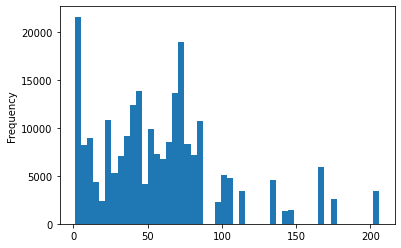

In [46]:
b['holiday int'][b['holiday int']>0].plot(kind = 'hist', bins = 50)

<AxesSubplot:ylabel='Frequency'>

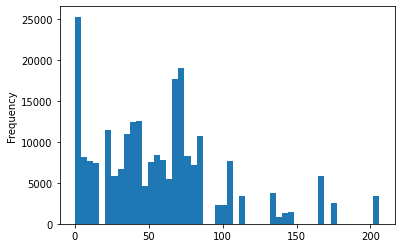

In [45]:
b['holiday int'].plot(kind = 'hist', bins = 50)

In [81]:
b[(0<b['holiday int']) & (b['holiday int']<6)]

eventID   case concept:name           case REG_DATE  \
4768     1756641624064             174968 2011-06-10 00:09:23.094   
4769     1756641624065             174968 2011-06-10 00:09:23.094   
4770     1756641624066             174968 2011-06-10 00:09:23.094   
4771     1760936591360             174979 2011-06-10 07:48:43.515   
4772     1760936591361             174979 2011-06-10 07:48:43.515   
...                ...                ...                     ...   
238933  33900176867389             198274 2012-05-01 12:30:09.519   
238934  33900176867391             198274 2012-05-01 12:30:09.519   
238935  33900176867390             198274 2012-05-01 12:30:09.519   
239109  45299020070958             206558 2012-05-02 10:04:55.721   
239115  45299020070959             206558 2012-05-02 10:04:55.721   

        case AMOUNT_REQ  event org:resource   event concept:name  \
4768              12750               112.0          A_SUBMITTED   
4769              12750               112.0    A_PARTLYSUBMITTED   
4770              12750               112.0   W_Afhandelen leads   
4771               5000               112.0          A_SUBMITTED   
4772               5000               112.0    A_PARTLYSUBMITTED   
...                 ...                 ...                  ...   
238933             8000             11003.0  W_Nabellen offertes   
238934             8000               112.0          O_CANCELLED   
238935             8000               112.0          A_CANCELLED   
239109            12000             11319.0  W_Nabellen offertes   
239115            12000             11319.0  W_Nabellen offertes   

       event lifecycle:transition    event time:timestamp  \
4768                     COMPLETE 2011-06-10 00:09:23.094   
4769                     COMPLETE 2011-06-10 00:09:23.309   
4770                     SCHEDULE 2011-06-10 00:09:53.644   
4771                     COMPLETE 2011-06-10 07:48:43.519   
4772                     COMPLETE 2011-06-10 07:48:48.675   
...                           ...                     ...   
238933                   COMPLETE 2012-04-03 09:15:20.506   
238934                   COMPLETE 2012-04-03 09:15:20.510   
238935                   COMPLETE 2012-04-03 09:15:20.510   
239109                      START 2012-05-03 11:38:50.559   
239115                   COMPLETE 2012-05-03 11:45:24.700   

        time_since_week_start  weekend  work_time     time_to_work_hours  \
4768   4 days 00:09:23.094000    False      False 0 days 07:50:36.906000   
4769   4 days 00:09:23.094000    False      False 0 days 07:50:36.906000   
4770   4 days 00:09:23.094000    False      False 0 days 07:50:36.906000   
4771   4 days 07:48:43.515000    False      False 0 days 00:11:16.485000   
4772   4 days 07:48:43.515000    False      False 0 days 00:11:16.485000   
...                       ...      ...        ...                    ...   
238933 1 days 12:30:09.519000    False       True        0 days 00:00:00   
238934 1 days 12:30:09.519000    False       True        0 days 00:00:00   
238935 1 days 12:30:09.519000    False       True        0 days 00:00:00   
239109 2 days 10:04:55.721000    False       True        0 days 00:00:00   
239115 2 days 10:04:55.721000    False       True        0 days 00:00:00   

       time_until_next_holiday  hour  day    weekday  hour_of_day  \
4768                    2 days     0    4     friday  00:00-00:59   
4769                    2 days     0    4     friday  00:00-00:59   
4770                    2 days     0    4     friday  00:00-00:59   
4771                    2 days     7    4     friday  07:00-07:59   
4772                    2 days     7    4     friday  07:00-07:59   
...                        ...   ...  ...        ...          ...   
238933                  4 days    12    1    tuesday  12:00-12:59   
238934                  4 days    12    1    tuesday  12:00-12:59   
238935                  4 days    12    1    tuesday  12:00-12:59   
239109                  3 days  

<AxesSubplot:xlabel='case REG_DATE', ylabel='holiday int'>

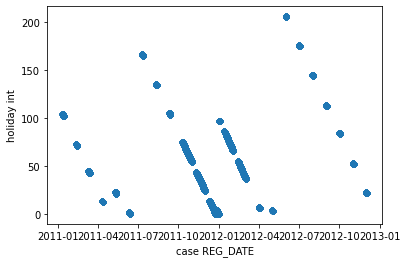

In [57]:
b.plot(x = 'case REG_DATE', y = 'holiday int', kind = 'scatter')

<AxesSubplot:xlabel='case REG_DATE'>

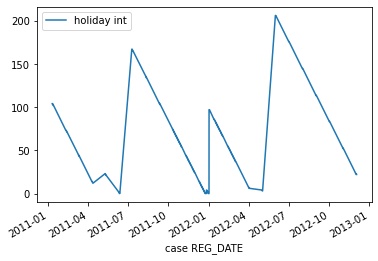

In [58]:
b.plot(x = 'case REG_DATE', y = 'holiday int', kind = 'line')

AttributeError: 'Rectangle' object has no property 'bins'

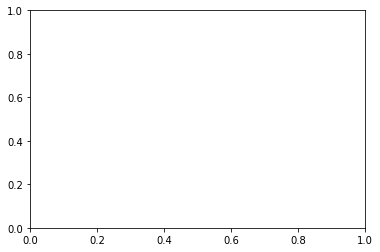

In [66]:
b.groupby(b['case REG_DATE'].date)

In [74]:
b['case REG_DATE'].apply(lambda x: x.date()).groupby(level = 0).count().plot(kind = 'bar')

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000027901B93EE8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000027901B93B88> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='case REG_DATE'>

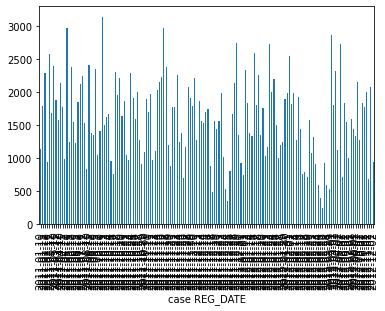

In [78]:
d = b['case REG_DATE'].apply(lambda x: x.date())
d.groupby(d).count().plot(kind = 'bar')

In [88]:
b[(datetime.date(2011,4,20)<b['date']) & (b['date']<datetime.date(2011,6,1))].groupby('date').describe()['holiday int']

count  mean  std   min   25%   50%   75%   max
date                                                       
2011-05-10  2971.0  23.0  0.0  23.0  23.0  23.0  23.0  23.0
2011-05-11  1240.0  22.0  0.0  22.0  22.0  22.0  22.0  22.0
2011-05-12  2382.0  21.0  0.0  21.0  21.0  21.0  21.0  21.0

In [114]:
[i for i in pd.date_range(b['date'].min(), b['date'].max()).difference(b['date'])]

[Timestamp('2011-01-13 00:00:00'),
 Timestamp('2011-01-14 00:00:00'),
 Timestamp('2011-01-15 00:00:00'),
 Timestamp('2011-01-16 00:00:00'),
 Timestamp('2011-01-17 00:00:00'),
 Timestamp('2011-01-18 00:00:00'),
 Timestamp('2011-01-19 00:00:00'),
 Timestamp('2011-01-20 00:00:00'),
 Timestamp('2011-01-21 00:00:00'),
 Timestamp('2011-01-22 00:00:00'),
 Timestamp('2011-01-23 00:00:00'),
 Timestamp('2011-01-24 00:00:00'),
 Timestamp('2011-01-25 00:00:00'),
 Timestamp('2011-01-26 00:00:00'),
 Timestamp('2011-01-27 00:00:00'),
 Timestamp('2011-01-28 00:00:00'),
 Timestamp('2011-01-29 00:00:00'),
 Timestamp('2011-01-30 00:00:00'),
 Timestamp('2011-01-31 00:00:00'),
 Timestamp('2011-02-01 00:00:00'),
 Timestamp('2011-02-02 00:00:00'),
 Timestamp('2011-02-03 00:00:00'),
 Timestamp('2011-02-04 00:00:00'),
 Timestamp('2011-02-05 00:00:00'),
 Timestamp('2011-02-06 00:00:00'),
 Timestamp('2011-02-07 00:00:00'),
 Timestamp('2011-02-08 00:00:00'),
 Timestamp('2011-02-09 00:00:00'),
 Timestamp('2011-02-

In [113]:
[i for i in pd.date_range(b['date'].min(), b['date'].max()).difference(pd.date_range(b['date'].min(), b['date'].max()).difference(b['date']))]

[Timestamp('2011-01-10 00:00:00'),
 Timestamp('2011-01-11 00:00:00'),
 Timestamp('2011-01-12 00:00:00'),
 Timestamp('2011-02-10 00:00:00'),
 Timestamp('2011-02-11 00:00:00'),
 Timestamp('2011-02-12 00:00:00'),
 Timestamp('2011-03-10 00:00:00'),
 Timestamp('2011-03-11 00:00:00'),
 Timestamp('2011-03-12 00:00:00'),
 Timestamp('2011-04-10 00:00:00'),
 Timestamp('2011-04-11 00:00:00'),
 Timestamp('2011-04-12 00:00:00'),
 Timestamp('2011-05-10 00:00:00'),
 Timestamp('2011-05-11 00:00:00'),
 Timestamp('2011-05-12 00:00:00'),
 Timestamp('2011-06-10 00:00:00'),
 Timestamp('2011-06-11 00:00:00'),
 Timestamp('2011-06-12 00:00:00'),
 Timestamp('2011-07-10 00:00:00'),
 Timestamp('2011-07-11 00:00:00'),
 Timestamp('2011-07-12 00:00:00'),
 Timestamp('2011-08-10 00:00:00'),
 Timestamp('2011-08-11 00:00:00'),
 Timestamp('2011-08-12 00:00:00'),
 Timestamp('2011-09-10 00:00:00'),
 Timestamp('2011-09-11 00:00:00'),
 Timestamp('2011-09-12 00:00:00'),
 Timestamp('2011-10-10 00:00:00'),
 Timestamp('2011-10-

In [110]:
b[b['date'] == '2011-01-13']

Empty DataFrame
Columns: [eventID , case concept:name, case REG_DATE, case AMOUNT_REQ, event org:resource, event concept:name, event lifecycle:transition, event time:timestamp, time_since_week_start, weekend, work_time, time_to_work_hours, time_until_next_holiday, hour, day, weekday, hour_of_day, holiday int, date]
Index: []

In [103]:
pd.date_range(c.index.min(), c.index.max())

DatetimeIndex(['2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13',
               '2011-01-14', '2011-01-15', '2011-01-16', '2011-01-17',
               '2011-01-18', '2011-01-19',
               ...
               '2012-11-23', '2012-11-24', '2012-11-25', '2012-11-26',
               '2012-11-27', '2012-11-28', '2012-11-29', '2012-11-30',
               '2012-12-01', '2012-12-02'],
              dtype='datetime64[ns]', length=693, freq='D')

In [104]:
pd.date_range('2011-01-10', '2012-12-02')

DatetimeIndex(['2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13',
               '2011-01-14', '2011-01-15', '2011-01-16', '2011-01-17',
               '2011-01-18', '2011-01-19',
               ...
               '2012-11-23', '2012-11-24', '2012-11-25', '2012-11-26',
               '2012-11-27', '2012-11-28', '2012-11-29', '2012-11-30',
               '2012-12-01', '2012-12-02'],
              dtype='datetime64[ns]', length=693, freq='D')